<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/ann_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
# Dataset
from tensorflow.keras.datasets import fashion_mnist

# Model
from tensorflow.keras import Sequential
# Layer
from tensorflow.keras.layers import Dense, Flatten, Dropout
# Activation
from tensorflow.keras.activations import relu, softmax
# Optimization
from tensorflow.keras.optimizers import Adam
# Loss
from tensorflow.keras.losses import sparse_categorical_crossentropy
# Metric
from tensorflow.keras.metrics import sparse_categorical_accuracy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

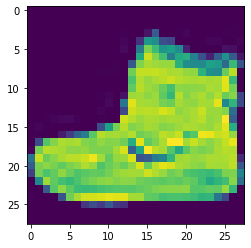

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

9

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
X_train.max()

255

In [10]:
X_test.max()

255

In [11]:
X_train[0].shape

(28, 28)

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

# build an ann
- there are different syntaxs with which you can create models in Tensorflow

In [0]:
# 1st way
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,relu))
model.add(Dense(100,relu))
model.add(Dense(10, softmax))

In [0]:
# 2nd way
model1 = Sequential([
                    Flatten(input_shape=[28,28]),
                    Dense(300, relu),
                    Dense(100, relu),
                    Dense(10, softmax)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# compile the model

In [0]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

# train the model

In [18]:
history = model.fit(X_train, y_train, batch_size=30, validation_split=0.2, epochs=10)

Epoch 1/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4948 - sparse_categorical_accuracy: 0.8199 - val_loss: 0.4246 - val_sparse_categorical_accuracy: 0.8456
Epoch 2/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3699 - sparse_categorical_accuracy: 0.8632 - val_loss: 0.3888 - val_sparse_categorical_accuracy: 0.8527
Epoch 3/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3309 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3540 - val_sparse_categorical_accuracy: 0.8720
Epoch 4/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3077 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.3564 - val_sparse_categorical_accuracy: 0.8709
Epoch 5/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.2868 - sparse_categorical_accuracy: 0.8924 - val_loss: 0.3310 - val_sparse_categorical_accuracy: 0.8808
Epoch 6/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.2720 - spars

In [20]:
history.history

{'loss': [0.49477580189704895,
  0.3698851764202118,
  0.330863356590271,
  0.3077448606491089,
  0.2868325114250183,
  0.27204880118370056,
  0.2588658630847931,
  0.24921546876430511,
  0.2355818748474121,
  0.22566865384578705],
 'sparse_categorical_accuracy': [0.8198750019073486,
  0.8631874918937683,
  0.8778333067893982,
  0.8853333592414856,
  0.8923958539962769,
  0.8973333239555359,
  0.9021458625793457,
  0.9049583077430725,
  0.9102708101272583,
  0.913770854473114],
 'val_loss': [0.42462870478630066,
  0.388815313577652,
  0.3539881110191345,
  0.3563566505908966,
  0.33095023036003113,
  0.33802542090415955,
  0.3350182771682739,
  0.3185911774635315,
  0.3220408856868744,
  0.32380494475364685],
 'val_sparse_categorical_accuracy': [0.8455833196640015,
  0.8526666760444641,
  0.871999979019165,
  0.8709166646003723,
  0.8807500004768372,
  0.8764166831970215,
  0.8861666917800903,
  0.8870833516120911,
  0.8887500166893005,
  0.8840000033378601]}

In [21]:
history_df = pd.DataFrame(history.history)
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.494776,0.819875,0.424629,0.845583
1,0.369885,0.863187,0.388815,0.852667
2,0.330863,0.877833,0.353988,0.872000
3,0.307745,0.885333,0.356357,0.870917
4,0.286833,0.892396,0.330950,0.880750
5,0.272049,0.897333,0.338025,0.876417
6,0.258866,0.902146,0.335018,0.886167
7,0.249215,0.904958,0.318591,0.887083
8,0.235582,0.910271,0.322041,0.888750
9,0.225669,0.913771,0.323805,0.884000


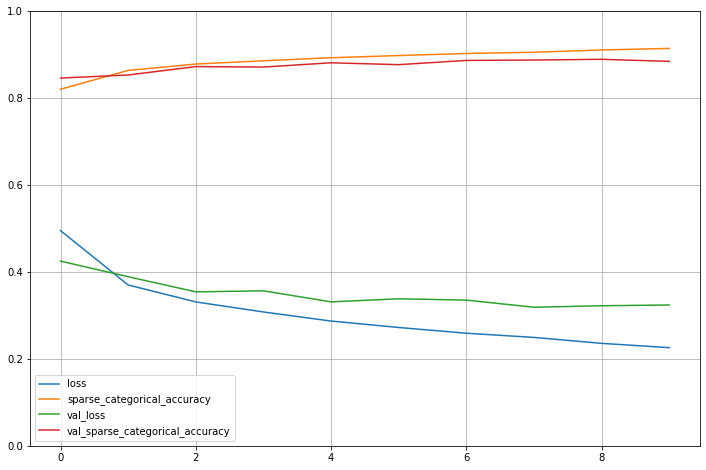

In [22]:
history_df.plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# evaluate

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - sparse_categorical_accuracy: 0.8782


[0.3463282585144043, 0.8781999945640564]

# predict

In [0]:
X_new = X_test[:3]

In [26]:
pred = model.predict(X_new)
pred.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   ,
        0.998],
       [0.   , 0.   , 0.991, 0.   , 0.007, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [27]:
pred_class = model.predict_classes(X_new)
pred_class

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])